In [1]:
import numpy as np
import networkx as nx
import pandas as pd

%matplotlib inline

## Use Sample Florentine networkx included in networkx

In [2]:
florentine_net = nx.florentine_families_graph()

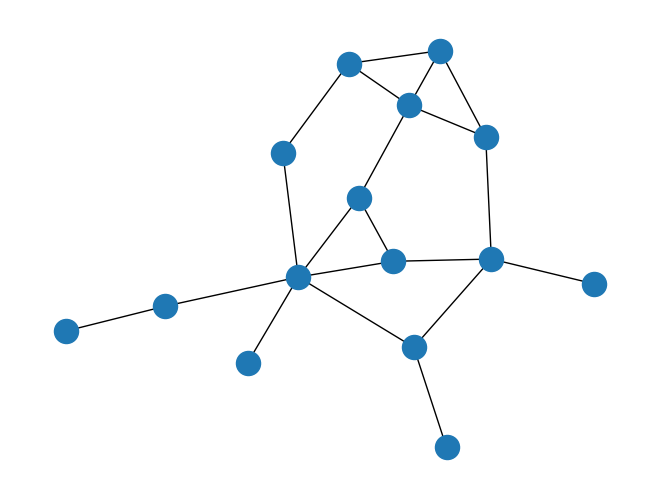

In [3]:
nx.draw(florentine_net)

## Update nodes with external wealth information

In [4]:
wealth = pd.read_csv('../data/PadgettAttrib.csv')
wealth

,id,WEALTH,PRIORS,Long,Lat
0,ACCIAIUOLI,10,53,11.252800,43.769335
1,ALBIZZI,36,65,11.261357,43.771374
2,RIDOLFI,27,38,11.249088,43.766877
3,STROZZI,146,74,11.251761,43.771273
4,BARBADORI,55,0,11.251945,43.767437
5,BISCHERI,44,12,11.256236,43.773448
6,CASTELLANI,20,22,11.255909,43.767761
7,GUADAGNI,8,21,11.247199,43.766106
8,LAMBERTESCHI,42,0,11.251471,43.769560
9,MEDICI,103,53,11.255775,43.775190


In [5]:
def append_wealth_to_graph(node, wealth):
    florentine_net.nodes[node.capitalize()]['wealth'] = wealth

In [6]:
for node, familywealth in zip(wealth['id'], wealth['WEALTH']):
    if node != "PUCCI":
        append_wealth_to_graph(node, familywealth)

In [7]:
florentine_net.nodes(data=True)

NodeDataView({'Acciaiuoli': {'wealth': 10}, 'Medici': {'wealth': 103}, 'Castellani': {'wealth': 20}, 'Peruzzi': {'wealth': 49}, 'Strozzi': {'wealth': 146}, 'Barbadori': {'wealth': 55}, 'Ridolfi': {'wealth': 27}, 'Tornabuoni': {'wealth': 48}, 'Albizzi': {'wealth': 36}, 'Salviati': {'wealth': 10}, 'Pazzi': {'wealth': 48}, 'Bischeri': {'wealth': 44}, 'Guadagni': {'wealth': 8}, 'Ginori': {'wealth': 32}, 'Lamberteschi': {'wealth': 42}})

## Calculate node centralities
In the end those centralities will be correlated with the wealth information

In [8]:
centralities = dict()
centralities['eigenvector'] = nx.eigenvector_centrality(florentine_net)
centralities['degree'] = nx.degree_centrality(florentine_net)
centralities['betweenness'] = nx.betweenness_centrality(florentine_net)
centralities['closeness'] = nx.closeness_centrality(florentine_net)

In [9]:
node_list = list(florentine_net.nodes('wealth'))
wealths = [w for n, w in node_list]

In [10]:
npa_wealth = np.asarray(wealths) 

## Execute permutation tests
Looking for significant pearson correlations between wealth and centrality measures. A p-value <= 0.05 will be considered as significant. In that case the p-value has to be interpreted as one-tailed.

In [11]:
random_generator = np.random.RandomState(42)

In [12]:
def permutation_test_pearson_correlation(x_original, y_original, num_rounds=20000):
    """
    Permutation test checking pearson correlation
    -------------
    x_original : First numpy array
    y_original : Second numpy array
    num_rounds : int (default: 20'000)
        The number of permutations.
    Returns
    ----------
    tuple (initial reference correlation, p-value)
    """
    
    x = np.copy(x_original)
    y = np.copy(y_original)
    
    more_extreme = 0
    reference_correlation = np.corrcoef(x_original, y_original)[1][0]
    
    for i in range(num_rounds):
        random_generator.shuffle(x)
        random_generator.shuffle(y)
        if np.corrcoef(x, y)[1][0] > reference_correlation:
            more_extreme += 1.

    return reference_correlation, more_extreme / num_rounds

In [13]:
for name, centrality in centralities.items():
    x = np.array(list(centrality.values())) 
    y = npa_wealth
    
    corr, p_val = permutation_test_pearson_correlation(x, y)
    
    print(f'Observed correlation of wealth and centrality using {name} was {corr} with a p-value of {p_val}')

Observed correlation of wealth and centrality using eigenvector was 0.4755441918560369 with a p-value of 0.02905
Observed correlation of wealth and centrality using degree was 0.5031865847536792 with a p-value of 0.04245
Observed correlation of wealth and centrality using betweenness was 0.3103916330276614 with a p-value of 0.1225
Observed correlation of wealth and centrality using closeness was 0.28773886173665764 with a p-value of 0.14965


## Result
There is a significant pearson correlation between degree centrality and wealth as well as eigenvector centrality and wealth.